# Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_path= r'C:\Users\CHARMI\Desktop\data\loan_modified.csv'
from pandas import read_csv

In [3]:
df=read_csv(data_path)
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (918, 18)


,Unnamed: 0,index,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Employed_for_at_least_years,Foreign_worker,SA_balance_type,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,0,0,67,1,3,1,7,1,3,6,5,1169000,4,3,0,0,2,0
1,1,1,22,0,1,1,1,1,1,48,5,5951000,2,3,0,0,1,1
2,2,2,49,1,3,1,4,1,1,12,4,2096000,2,3,0,0,1,0
3,3,4,53,1,3,0,1,1,1,24,6,4870000,3,0,0,0,2,1
4,4,6,53,1,3,1,7,1,0,24,0,2835000,3,1,0,0,1,0


In [7]:
col=['Unnamed: 0','index']
df=df.drop(col, axis=1)

In [8]:
df

,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Employed_for_at_least_years,Foreign_worker,SA_balance_type,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,67,1,3,1,7,1,3,6,5,1169000,4,3,0,0,2,0
1,22,0,1,1,1,1,1,48,5,5951000,2,3,0,0,1,1
2,49,1,3,1,4,1,1,12,4,2096000,2,3,0,0,1,0
3,53,1,3,0,1,1,1,24,6,4870000,3,0,0,0,2,1
4,53,1,3,1,7,1,0,24,0,2835000,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,31,0,1,1,4,1,1,12,0,1736000,3,3,0,0,1,0
914,40,1,0,1,1,1,1,30,8,3857000,4,1,0,0,1,0
915,38,1,3,1,7,1,1,12,5,804000,4,2,0,0,1,0
916,23,1,3,0,1,1,1,45,5,1845000,4,0,0,0,1,1


# Specify input and output attribute

In [9]:
# specify input and output attributes
X = df.drop(columns=['high_risk_applicant'], axis=1)
y = df['high_risk_applicant']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

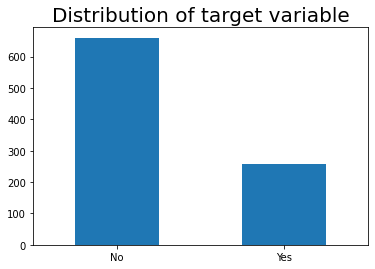

In [44]:
df['high_risk_applicant'].value_counts().plot(kind='bar')
plt.title('Distribution of target variable', size=20)
plt.xticks(ticks=[0,1],labels=['No', 'Yes'],rotation=360);

# Applying models

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 70.65217391304348
Cross validation is 72.65918270373011


In [42]:
Actual=pd.DataFrame(y_test)
Prediction=pd.DataFrame(model.predict(x_test))
c = pd.DataFrame({"Actual": y_test, "Predictions": model.predict(x_test)})

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 75.0
Cross validation is 71.895937277263


In [18]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[124,  14],
       [ 38,   8]], dtype=int64)

<AxesSubplot:>

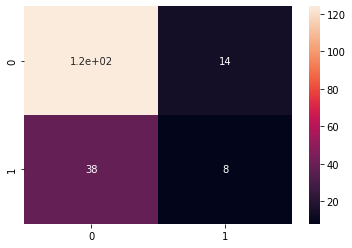

In [19]:
sns.heatmap(cm, annot=True)